In [69]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [70]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_familiarity_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_familiarity_labels_df.pkl"))

In [71]:
# Remove all the features that contains 'Post' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# Remove all the features that contains 'RoI' in their name and 'DVA'
# features_df = features_df.loc[:, ~features_df.columns.str.contains('RoI') & ~features_df.columns.str.contains('DVA')]

# Remove all the features that are contains 'Saccades' in their name
# features_df = features_df.loc[:, features_df.columns.str.contains('Saccades') | features_df.columns.str.contains(config.MOVIE)]

# # Remove all the features that are not contains 'DVA' in their name
# features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

features_df.head()

,Movie,Blinks_Per_Minute,Blinks_Duration_Mean,Blinks_Duration_Median,Blink_Variability,Blinks_Duration_Min,Blinks_Duration_Max,Fixations_Count,Fixations_Rate,Fixations_Duration_Mean,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,33,-37.500000,34.188034,66.666667,-44.796771,66.666667,-33.333333,0.000000,0.000000,-7.755397,...,-18.875728,-1.420791,-15.570749,-11.802935,-32.273440,-4.048442,-2.722535,-57.357699,-10.830262,2.078786
1,8,NaN,NaN,NaN,NaN,NaN,NaN,18.367347,18.367347,-23.497718,...,-72.525685,16.690905,-8.708952,-9.308330,-17.565498,18.564190,9.811735,-69.709180,11.343919,6.964994
2,47,50.000000,0.000000,0.000000,NaN,0.000000,0.000000,8.771930,8.771930,-3.512142,...,-39.718115,30.059580,-11.666385,-9.424374,9.446190,26.540207,-5.706847,-35.048813,28.448580,-14.069278
3,25,-81.818182,-80.000000,0.000000,-100.000000,0.000000,-90.909091,18.181818,18.181818,-23.706937,...,-60.517878,15.106873,-8.675981,-3.185722,-25.217529,9.681724,17.167546,-8.770329,1.061286,13.924542
4,12,-89.473684,86.851211,92.156863,66.002803,95.000000,67.741935,3.703704,3.703704,-14.251401,...,6.104874,-49.699963,-0.999620,5.882346,-2.156349,-56.384114,0.511017,32.046874,-59.201075,17.647052


EDA

In [72]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 100 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Movie                                            604 non-null    int8   
 1   Blinks_Per_Minute                                563 non-null    float64
 2   Blinks_Duration_Mean                             467 non-null    float64
 3   Blinks_Duration_Median                           467 non-null    float64
 4   Blink_Variability                                367 non-null    float64
 5   Blinks_Duration_Min                              467 non-null    float64
 6   Blinks_Duration_Max                              467 non-null    float64
 7   Fixations_Count                                  604 non-null    float64
 8   Fixations_Rate                                   604 non-null    float64
 9   Fixations_Duration_Mean        

In [73]:
labels_df.head()

,familiarity
series_id,
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [74]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 603
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   familiarity  604 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


<AxesSubplot:>

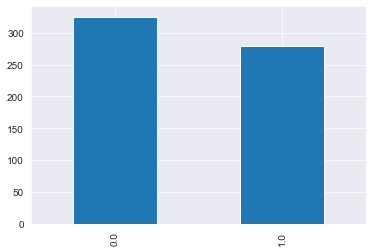

In [75]:
labels_df['familiarity'].value_counts().plot(kind='bar')

Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [76]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Duration_Sem_Fixations_In_RoI_Pre               0.733444
Duration_Std_Fixations_In_RoI_Pre               0.733444
Start_Time_Sem_Fixations_In_RoI_Pre             0.731788
Start_Time_Std_Fixations_In_RoI_Pre             0.731788
Mean_Pupil_Fixations_First_Diff_Pre             0.730132
Mean_Pupil_Fixations_ReEntry_Mean_Diff_Pre      0.725166
Duration_Sem_Saccades_Start_In_RoI_Pre          0.687086
Duration_Std_Saccades_Start_In_RoI_Pre          0.687086
Start_Time_Sem_Saccades_Start_In_RoI_Pre        0.683775
Total Distance_Sem_Saccades_Start_In_RoI_Pre    0.683775
dtype: float64

Remove columns with more than 30% missing values or inf values

In [77]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [78]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Gaze_In_out_RoI_Ratio_Pre           0.298013
Gaze_Re_Entries_To_RoI_Count_Pre    0.298013
Gaze_Re_Entries_To_RoI_Rate_Pre     0.298013
Gaze_Counts_In_RoI_Pre              0.298013
Blinks_Duration_Mean                0.226821
Blinks_Duration_Median              0.226821
Blinks_Duration_Min                 0.226821
Blinks_Duration_Max                 0.226821
Blinks_Per_Minute                   0.067881
Movie                               0.000000
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [79]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

240    0.191489
277    0.191489
66     0.191489
404    0.191489
338    0.191489
449    0.191489
108    0.191489
447    0.191489
359    0.191489
395    0.191489
dtype: float64

Remove rows with more than 50% missing values

In [80]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [81]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)


240    0.191489
277    0.191489
66     0.191489
404    0.191489
338    0.191489
449    0.191489
108    0.191489
447    0.191489
359    0.191489
395    0.191489
dtype: float64

Train/Test Split (before any preprocessing is done)

In [82]:
# Excluding for comparison- BB13, DK47
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_familiarity_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly with seed 1
np.random.seed(1)
np.random.shuffle(subject_ids)

# Order the list of subject IDs alphabetically
# subject_ids = np.sort(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
print(train_subject_ids)
test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]
print(test_subject_ids)

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

['RL69' 'NA43' 'AW35' 'NZ19' 'ND46' 'YG31' 'MM08' 'CG62' 'GH44' 'OK15'
 'NE69' 'YT92' 'TW82' 'NF76' 'CD91' 'KE46' 'ZF67' 'TS39' 'TB29' 'BP55'
 'MA36' 'MG07' 'LD74' 'UD25' 'AM32' 'NP15' 'AP21']
['ET81' 'TL57' 'RF42']


In [83]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df['mem'],
#                                                     random_state=420,
#                                                     test_size=0.2)

In [84]:
X_train.head()

,Movie,Blinks_Per_Minute,Blinks_Duration_Mean,Blinks_Duration_Median,Blinks_Duration_Min,Blinks_Duration_Max,Fixations_Count,Fixations_Rate,Fixations_Duration_Mean,Fixations_Duration_Median,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,33,-37.500000,34.188034,66.666667,66.666667,-33.333333,0.000000,0.000000,-7.755397,-15.986395,...,-18.875728,-1.420791,-15.570749,-11.802935,-32.273440,-4.048442,-2.722535,-57.357699,-10.830262,2.078786
1,8,NaN,NaN,NaN,NaN,NaN,18.367347,18.367347,-23.497718,-15.517241,...,-72.525685,16.690905,-8.708952,-9.308330,-17.565498,18.564190,9.811735,-69.709180,11.343919,6.964994
2,47,50.000000,0.000000,0.000000,0.000000,0.000000,8.771930,8.771930,-3.512142,0.000000,...,-39.718115,30.059580,-11.666385,-9.424374,9.446190,26.540207,-5.706847,-35.048813,28.448580,-14.069278
3,25,-81.818182,-80.000000,0.000000,0.000000,-90.909091,18.181818,18.181818,-23.706937,-16.370107,...,-60.517878,15.106873,-8.675981,-3.185722,-25.217529,9.681724,17.167546,-8.770329,1.061286,13.924542
4,12,-89.473684,86.851211,92.156863,95.000000,67.741935,3.703704,3.703704,-14.251401,-2.040816,...,6.104874,-49.699963,-0.999620,5.882346,-2.156349,-56.384114,0.511017,32.046874,-59.201075,17.647052


In [85]:
y_train

,familiarity
series_id,
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
598,0.0
599,1.0
600,1.0


Fill missing values with the mean of the column

In [86]:
# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(0)

Remove columns with low variance (threshold = 5%)

In [87]:
from sklearn.feature_selection import VarianceThreshold

# Get the indices of the non-numerical columns
non_numeric_columns_idx = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(exclude=['float64', 'int64']).columns]

# Create VarianceThreshold object with a variance with a threshold of 0.05
thresholder = VarianceThreshold(threshold=0.05)

# Fit the thresholder to the data
thresholder.fit(X_train.select_dtypes(include=['float64', 'int64']))

# Get the indices of the columns that are retained
feature_idx = thresholder.get_support(indices=True)

# Create a list of the names of the retained columns, and the non-numerical columns
feature_idx = list(feature_idx) + list(non_numeric_columns_idx)
feature_names = X_train.columns[feature_idx]

# Print the names of the dropped columns
dropped_columns = list(set(X_train.columns) - set(feature_names))
print(dropped_columns)

# Subset the dataframe to include only the selected columns
X_train = X_train[feature_names]
X_test = X_test[feature_names]

['DVA_AUC_Fixations_Pre']


Remove highly correlated features

In [88]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

How many features are left?

In [89]:
X_train.shape

(543, 39)

Balancing the dataset

In [90]:
y_train.value_counts()

familiarity
0.0            286
1.0            257
dtype: int64

SMOTE

In [91]:
# from imblearn.over_sampling import SMOTE
#
# sm = SMOTE(random_state=420)
# X_train, y_train = sm.fit_resample(X_train, y_train)

Random Oversampling

In [92]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=420)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [93]:
y_train.value_counts()

familiarity
0.0            286
1.0            286
dtype: int64

Scaling

In [94]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

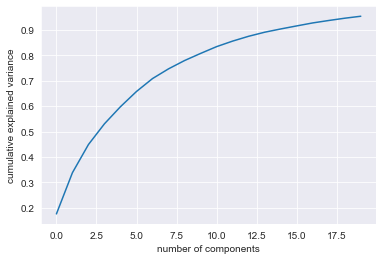

In [95]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [96]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [97]:
X_train_pca

array([[-0.1270812 , -1.80104164, -0.24816561, ..., -0.58007612,
        -0.38181378,  0.32773674],
       [-2.03606493, -0.68323274,  1.07845374, ..., -0.06719869,
        -0.23647956, -0.09985193],
       [-1.39655818, -1.84694513,  1.20300951, ...,  0.20680891,
         1.21615709,  0.16385342],
       ...,
       [ 1.29404442, -0.98859437,  1.29991034, ...,  0.15243887,
        -0.22866686,  0.91924402],
       [-0.54604031, -0.93719065,  1.84056842, ..., -0.05877755,
         0.63975423,  0.77750947],
       [-0.90753722, -3.45059321,  1.67451966, ...,  1.07291093,
        -0.36278354, -1.25640482]])

LDA

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

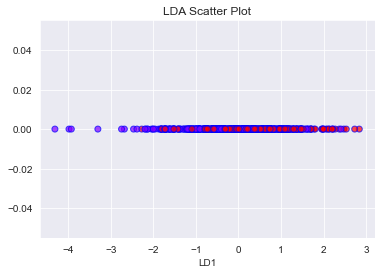

In [99]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [100]:
X_train_preprocessed = X_train
X_test_preprocessed = X_test

Classification models

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [102]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [103]:
# from sklearn.linear_model import LogisticRegression
# 
# # Define the range of values for each hyperparameter
# C = np.linspace(0.01, 1, 15)
# PENALTY = ['l1', 'l2']
# SOLVER = ['liblinear', 'saga']
# 
# PARAM_GRID  = {
#     'C': C,
#     'penalty': PENALTY,
#     'solver': SOLVER
# }
# 
# # Create the logistic regression estimator
# estimator = LogisticRegression(random_state=420)
# 
# # Use grid search and cross-validation to tune the hyper parameters
# model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
# model_searcher.fit(X_train_preprocessed, y_train)
# 
# # The best combination of hyperparameters
# model_searcher.best_params_

In [104]:
# # Get the best estimator
# log_reg_best_estimator = model_searcher.best_estimator_
# y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)
# 
# evaluate_model("Logistic Regression (test data)", y_test, y_test_pred) 

Gradient Boosting model

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 5)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.44555555555555554, 'max_depth': 4, 'n_estimators': 175}

Gradient Boosting (test data)
Accuracy: 0.56
Precision: 0.41
Recall: 0.55
F1-score: 0.47
ROC-AUC score: 0.55


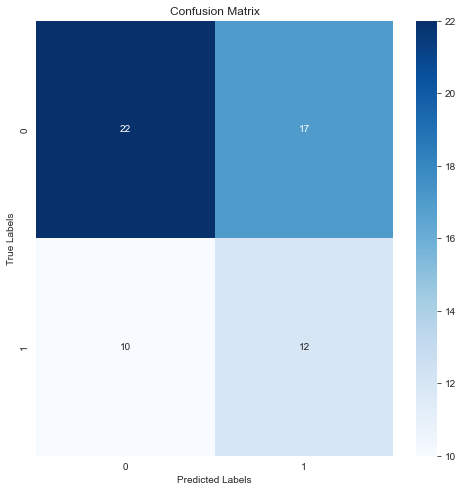

In [106]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Support Vector Machine model

In [107]:
from sklearn.svm import SVC

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 1, 15)
KERNEL = ['linear', 'poly', 'rbf', 'sigmoid']
GAMMA = ['scale', 'auto']

PARAM_GRID  = {
    'C': C,
    'kernel': KERNEL,
    'gamma': GAMMA
}

# Create the support vector machine estimator
estimator = SVC(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'C': 0.5757142857142857, 'gamma': 'auto', 'kernel': 'rbf'}

Evaluate the best model on the test data

Support Vector Machine (test data)
Accuracy: 0.64
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC score: 0.5


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


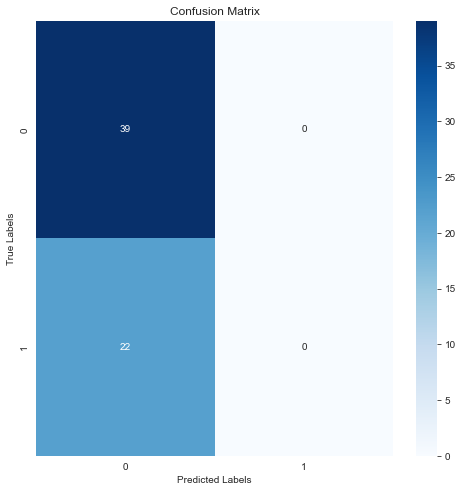

In [108]:
svm_best_estimator = model_searcher.best_estimator_
y_test_pred = svm_best_estimator.predict(X_test_preprocessed)

evaluate_model("Support Vector Machine (test data)", y_test, y_test_pred)

Random Forest model

In [109]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 140, 15)
MAX_DEPTH = range(2, 6)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)


# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 95}

Random Forest (test data)
Accuracy: 0.7
Precision: 0.58
Recall: 0.64
F1-score: 0.61
ROC-AUC score: 0.69


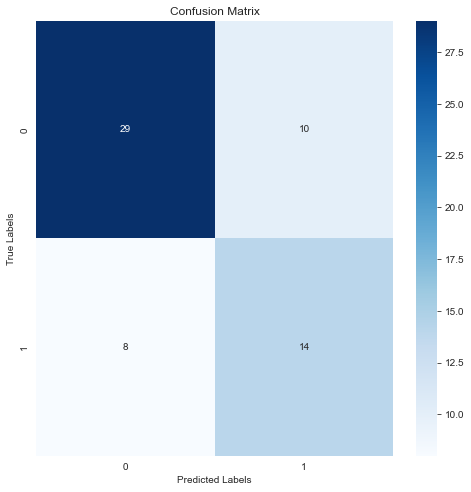

In [110]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [111]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 0.5, 10)
MAX_DEPTH = range(1, 5)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Define the ratio for scale_pos_weight
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

# Create a XGBoost classifier with specific parameters
estimator = XGBClassifier(objective='binary:logistic', scale_pos_weight=ratio)


# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 130}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.57
Precision: 0.42
Recall: 0.5
F1-score: 0.46
ROC-AUC score: 0.56


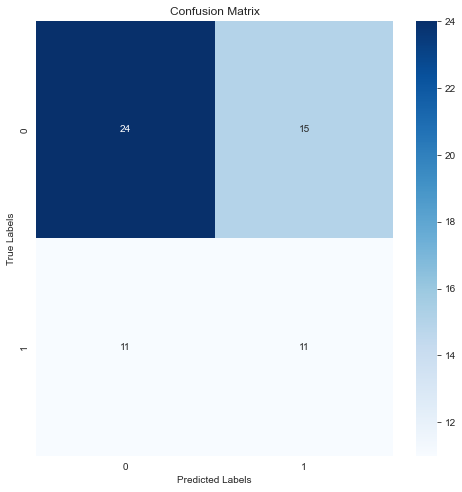

In [112]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [113]:
!pip install pytorch-tabnet
!pip install optuna

In [114]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [115]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 19),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet = TabNetClassifier(**best_params)
tabnet.fit(X_train_np, y_train)
best_params

[I 2023-11-19 14:58:32,102] A new study created in memory with name: no-name-c2df9f36-d33d-4f28-b852-96c7a6a545ad



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.63403


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:33,122] Trial 0 finished with value: 0.634032634032634 and parameters: {'n_d': 21, 'n_a': 43, 'n_steps': 13, 'gamma': 0.6356631112194269, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.009090306364967564}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:33,495] Trial 1 finished with value: 0.47202797202797203 and parameters: {'n_d': 43, 'n_a': 64, 'n_steps': 4, 'gamma': 0.5892895009206274, 'n_independent': 7, 'n_shared': 1, 'lambda_sparse': 0.09357862799599792}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47203

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52273


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:35,075] Trial 2 finished with value: 0.5227272727272727 and parameters: {'n_d': 32, 'n_a': 27, 'n_steps': 13, 'gamma': 1.1253850874812958, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.0714177383585758}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48135


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:36,573] Trial 3 finished with value: 0.4813519813519814 and parameters: {'n_d': 63, 'n_a': 55, 'n_steps': 10, 'gamma': 1.9656808933820111, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.0034461842500717404}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.45746


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:38,666] Trial 4 finished with value: 0.4574592074592075 and parameters: {'n_d': 60, 'n_a': 47, 'n_steps': 10, 'gamma': 1.2812188029178715, 'n_independent': 9, 'n_shared': 10, 'lambda_sparse': 0.009614373279783234}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47436


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:39,553] Trial 5 finished with value: 0.47435897435897434 and parameters: {'n_d': 62, 'n_a': 60, 'n_steps': 7, 'gamma': 0.4490648665140571, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.06586407722470523}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.54254


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:41,608] Trial 6 finished with value: 0.5425407925407925 and parameters: {'n_d': 57, 'n_a': 18, 'n_steps': 17, 'gamma': 0.7727937187747026, 'n_independent': 8, 'n_shared': 5, 'lambda_sparse': 0.027256925246634138}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:41,929] Trial 7 finished with value: 0.43356643356643354 and parameters: {'n_d': 14, 'n_a': 42, 'n_steps': 4, 'gamma': 0.6471573888537272, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.00013125433714682497}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.43357


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:42,423] Trial 8 finished with value: 0.5081585081585082 and parameters: {'n_d': 43, 'n_a': 43, 'n_steps': 3, 'gamma': 1.7874554743124444, 'n_independent': 6, 'n_shared': 8, 'lambda_sparse': 0.006420550879543541}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50816

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:44,630] Trial 9 finished with value: 0.5297202797202797 and parameters: {'n_d': 39, 'n_a': 22, 'n_steps': 18, 'gamma': 1.6138105479645366, 'n_independent': 7, 'n_shared': 9, 'lambda_sparse': 0.0006108992118707315}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:44,986] Trial 10 finished with value: 0.5273892773892773 and parameters: {'n_d': 10, 'n_a': 10, 'n_steps': 14, 'gamma': 0.13127575358469845, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.03527017284659303}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52739

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.45047


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:47,141] Trial 11 finished with value: 0.45046620046620045 and parameters: {'n_d': 24, 'n_a': 30, 'n_steps': 19, 'gamma': 0.8966267309562734, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.028770934253387302}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.45862


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:48,231] Trial 12 finished with value: 0.45862470862470867 and parameters: {'n_d': 23, 'n_a': 13, 'n_steps': 15, 'gamma': 0.8970807224096606, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.029188709854799662}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.57284


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:49,088] Trial 13 finished with value: 0.5728438228438228 and parameters: {'n_d': 51, 'n_a': 34, 'n_steps': 16, 'gamma': 0.30831814822806103, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.01780411535190557}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:49,549] Trial 14 finished with value: 0.5093240093240092 and parameters: {'n_d': 53, 'n_a': 35, 'n_steps': 12, 'gamma': 0.3167117116811115, 'n_independent': 1, 'n_shared': 3, 'lambda_sparse': 0.013749446342822158}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50932

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:50,457] Trial 15 finished with value: 0.5 and parameters: {'n_d': 49, 'n_a': 51, 'n_steps': 16, 'gamma': 0.11991680477995936, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.04428935208755126}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:51,093] Trial 16 finished with value: 0.5122377622377623 and parameters: {'n_d': 32, 'n_a': 37, 'n_steps': 8, 'gamma': 0.4653742595132109, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.01699587458548016}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51224

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50758


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:51,854] Trial 17 finished with value: 0.5075757575757576 and parameters: {'n_d': 21, 'n_a': 35, 'n_steps': 12, 'gamma': 0.40708889980686846, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.018886546983807203}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:52,641] Trial 18 finished with value: 0.5769230769230769 and parameters: {'n_d': 29, 'n_a': 28, 'n_steps': 16, 'gamma': 0.6681155150634948, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.019485986647480746}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.57692


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:53,245] Trial 19 finished with value: 0.5209790209790209 and parameters: {'n_d': 16, 'n_a': 24, 'n_steps': 8, 'gamma': 0.6859872927929136, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.04255751166821073}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52098

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5507


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:54,191] Trial 20 finished with value: 0.5506993006993007 and parameters: {'n_d': 28, 'n_a': 43, 'n_steps': 19, 'gamma': 1.11853583270077, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.021344919624589488}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:55,053] Trial 21 finished with value: 0.5693473193473193 and parameters: {'n_d': 35, 'n_a': 29, 'n_steps': 16, 'gamma': 0.2957049275172691, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.016227218026781166}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56935


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:55,617] Trial 22 finished with value: 0.5 and parameters: {'n_d': 18, 'n_a': 37, 'n_steps': 14, 'gamma': 0.5442415166887005, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.011289722422875636}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:56,398] Trial 23 finished with value: 0.47377622377622375 and parameters: {'n_d': 28, 'n_a': 32, 'n_steps': 17, 'gamma': 0.774217489327577, 'n_independent': 1, 'n_shared': 5, 'lambda_sparse': 0.023756853048464147}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47378

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:57,377] Trial 24 finished with value: 0.5 and parameters: {'n_d': 48, 'n_a': 19, 'n_steps': 12, 'gamma': 0.5430880639833127, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.010596312558270267}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:57,862] Trial 25 finished with value: 0.41899766899766905 and parameters: {'n_d': 9, 'n_a': 40, 'n_steps': 15, 'gamma': 0.31347983969723303, 'n_independent': 2, 'n_shared': 2, 'lambda_sparse': 0.033573806261078046}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.419

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49825


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:58,977] Trial 26 finished with value: 0.4982517482517482 and parameters: {'n_d': 39, 'n_a': 50, 'n_steps': 17, 'gamma': 0.7289771017488943, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.022288349715359732}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:58:59,147] Trial 27 finished with value: 0.48484848484848486 and parameters: {'n_d': 27, 'n_a': 26, 'n_steps': 1, 'gamma': 0.9217483265448628, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.007969763135137125}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48485

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47436


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:00,123] Trial 28 finished with value: 0.47435897435897434 and parameters: {'n_d': 31, 'n_a': 32, 'n_steps': 14, 'gamma': 0.23758179936521084, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.01709608086726024}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:00,585] Trial 29 finished with value: 0.4597902097902098 and parameters: {'n_d': 43, 'n_a': 58, 'n_steps': 11, 'gamma': 0.5710820526011634, 'n_independent': 2, 'n_shared': 2, 'lambda_sparse': 0.03482257998757192}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.45979

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53322


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:01,751] Trial 30 finished with value: 0.5332167832167831 and parameters: {'n_d': 47, 'n_a': 45, 'n_steps': 15, 'gamma': 0.6049860467513948, 'n_independent': 5, 'n_shared': 3, 'lambda_sparse': 0.006017189649415909}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:02,632] Trial 31 finished with value: 0.4242424242424243 and parameters: {'n_d': 36, 'n_a': 29, 'n_steps': 16, 'gamma': 0.33625297265857546, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.015084917689067268}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.42424


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:03,421] Trial 32 finished with value: 0.5 and parameters: {'n_d': 35, 'n_a': 39, 'n_steps': 13, 'gamma': 0.21398975822348065, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.022257461487607263}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:04,413] Trial 33 finished with value: 0.5 and parameters: {'n_d': 40, 'n_a': 28, 'n_steps': 16, 'gamma': 0.42238878799119306, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.013986574918648683}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:05,179] Trial 34 finished with value: 0.5087412587412588 and parameters: {'n_d': 33, 'n_a': 21, 'n_steps': 18, 'gamma': 0.2393795073421679, 'n_independent': 1, 'n_shared': 5, 'lambda_sparse': 0.005710701324944141}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50874


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:05,872] Trial 35 finished with value: 0.5914918414918415 and parameters: {'n_d': 20, 'n_a': 33, 'n_steps': 13, 'gamma': 0.44376035776494016, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.05750904907803766}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.59149


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:06,600] Trial 36 finished with value: 0.506993006993007 and parameters: {'n_d': 19, 'n_a': 49, 'n_steps': 10, 'gamma': 0.47534066889593396, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.07933941912385156}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50699


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:07,409] Trial 37 finished with value: 0.4900932400932401 and parameters: {'n_d': 13, 'n_a': 33, 'n_steps': 13, 'gamma': 0.6375848065589957, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.05622413554687561}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49009


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:08,034] Trial 38 finished with value: 0.4825174825174825 and parameters: {'n_d': 22, 'n_a': 16, 'n_steps': 11, 'gamma': 0.5095606434820249, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.052811368999909715}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48252

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50758


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:09,205] Trial 39 finished with value: 0.5075757575757576 and parameters: {'n_d': 25, 'n_a': 64, 'n_steps': 9, 'gamma': 0.3742327314386408, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.060476031972245874}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.59615


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:10,142] Trial 40 finished with value: 0.596153846153846 and parameters: {'n_d': 55, 'n_a': 39, 'n_steps': 14, 'gamma': 0.6760500473964134, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.0465795712400275}. Best is trial 0 with value: 0.634032634032634.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47028


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-11-19 14:59:11,146] Trial 41 finished with value: 0.4702797202797203 and parameters: {'n_d': 58, 'n_a': 39, 'n_steps': 14, 'gamma': 0.8122710495531915, 'n_independent': 6, 'n_shared': 1, 'lambda_sparse': 0.046289273568528314}. Best is trial 0 with value: 0.634032634032634.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

{'n_d': 21,
 'n_a': 43,
 'n_steps': 13,
 'gamma': 0.6356631112194269,
 'n_independent': 3,
 'n_shared': 6,
 'lambda_sparse': 0.009090306364967564}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.56
Precision: 0.44
Recall: 0.91
F1-score: 0.6
ROC-AUC score: 0.63


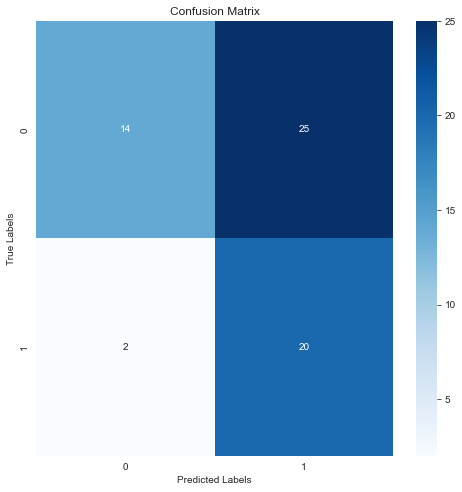

In [116]:
# Evaluate final model on test set
y_test_pred = tabnet.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [128]:
the_best_model_ever = rf_best_estimator

Feature importance

In [129]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Fixation_Mean_Pupil_Mean,0.055415
DVA_Median_Fixations_Pre,0.035513
Fixation_Mean_Pupil_StDev,0.033594
DVA_Mean_Gaze_Pre,0.032769
Saccades_Peak_Velocitiy_Mean,0.032703
Fixations_Saccades_Ratio,0.032140
DVA_Median_Gaze_Pre,0.032047
DVA_Min_Gaze_Pre,0.031711
DVA_Min_Fixations_Pre,0.031426
Saccades_Duration_Median,0.031332


Save the best model

In [130]:
import pickle

# Save the best model
with open(os.path.join(config.classification_resource_dir, 'the_best_model_ever.pkl'), 'wb') as f:
    pickle.dump(the_best_model_ever, f)

In [131]:
# Load the best model
with open(os.path.join(config.classification_resource_dir, 'the_best_model_ever.pkl'), 'rb') as f:
    the_saved_model = pickle.load(f)

Desicion Tree model

In [132]:
from sklearn.tree import DecisionTreeClassifier

# Define the range of values for each hyperparameter
MAX_DEPTH = range(1, 4)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the decision tree estimator
estimator = DecisionTreeClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree (test data)
Accuracy: 0.67
Precision: 0.53
Recall: 0.73
F1-score: 0.62
ROC-AUC score: 0.68


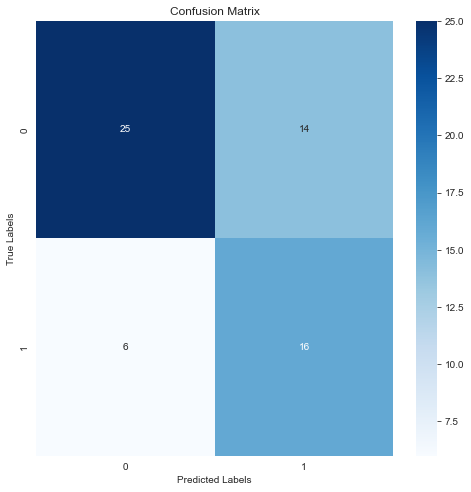

In [134]:
dt_best_estimator = model_searcher.best_estimator_
y_test_pred = dt_best_estimator.predict(X_test_preprocessed)

evaluate_model("Decision Tree (test data)", y_test, y_test_pred)

Visualize the DecisionTreeClassifier

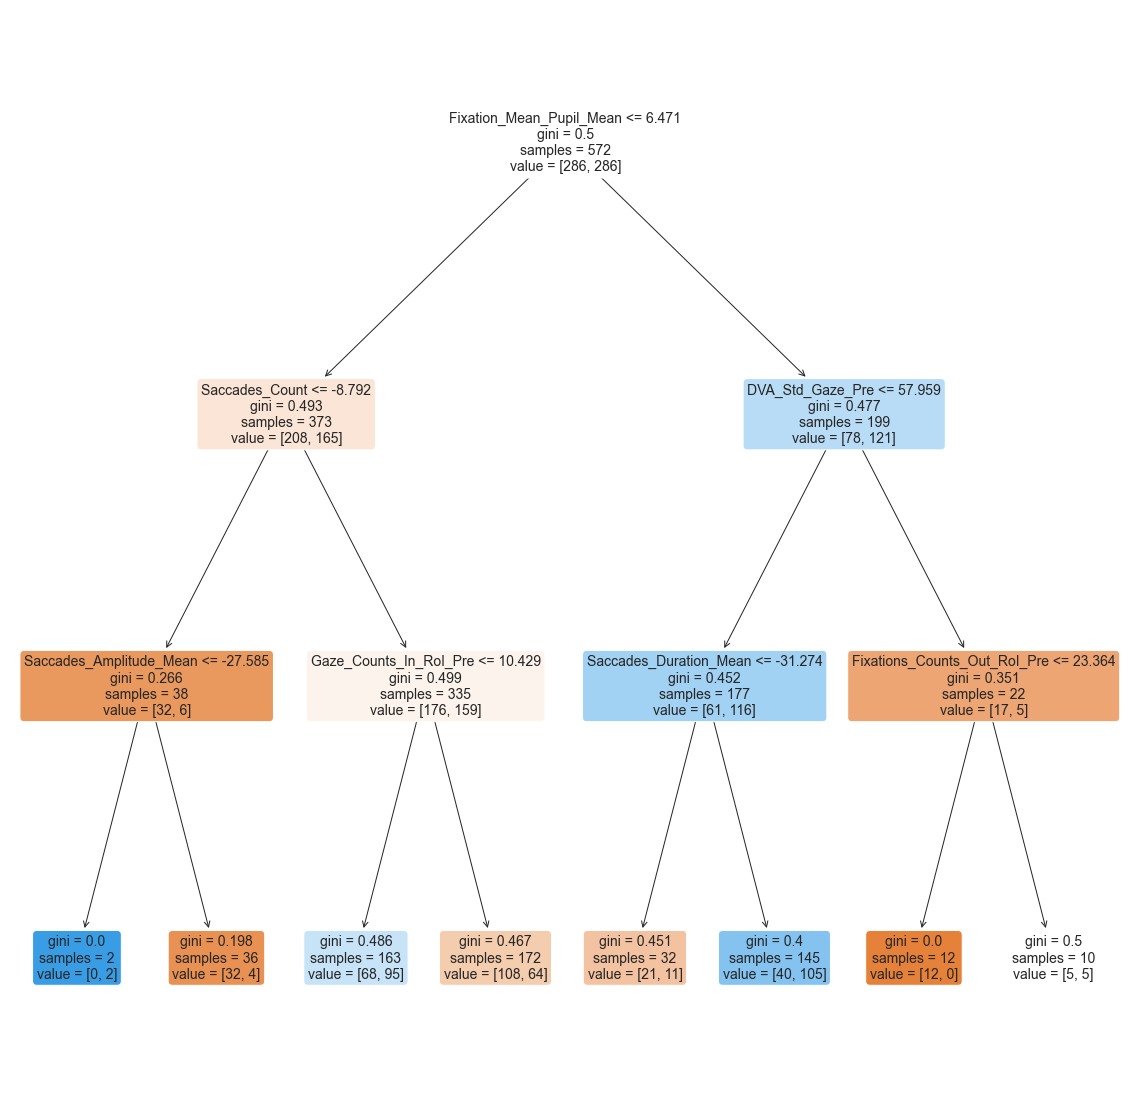

In [135]:
from sklearn.tree import plot_tree

# Plot the first tree
plt.figure(figsize=(20, 20))
plot_tree(dt_best_estimator, feature_names=X_train_preprocessed.columns, filled=True, rounded=True, fontsize=14)

# Save the tree as png file
plt.savefig('plot_tree.png')

# Show the plot
plt.show()


Plot Decision Tree with Graphviz

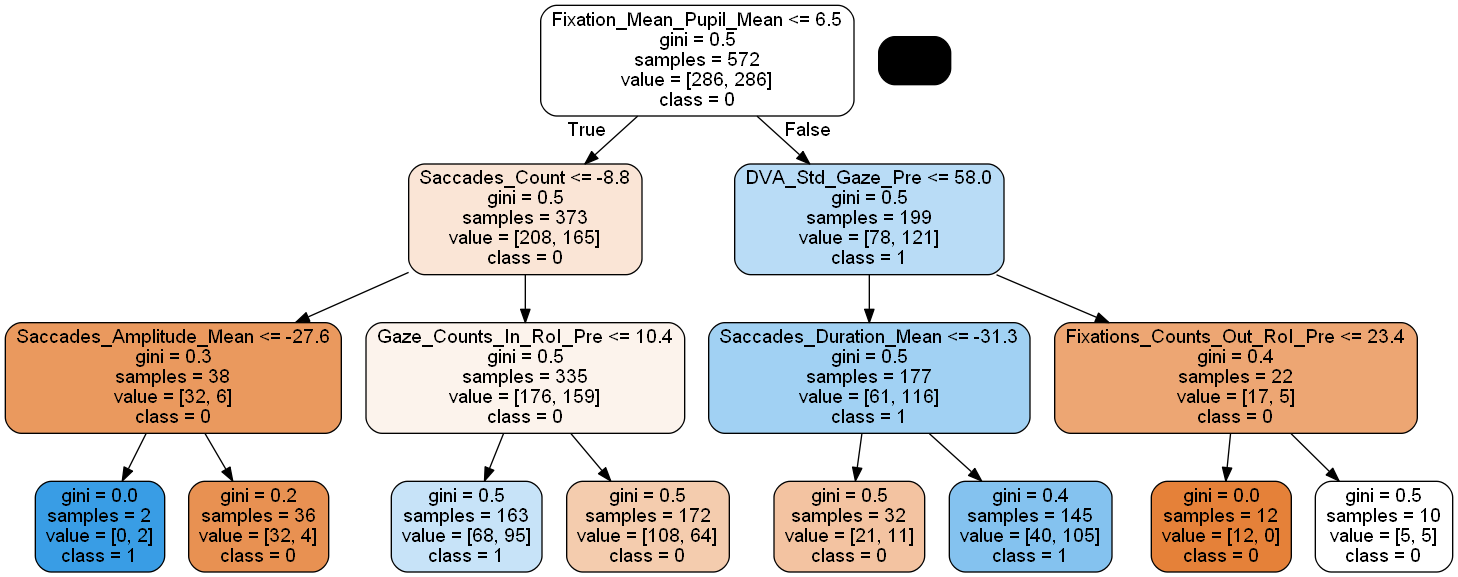

In [136]:
from sklearn.tree import export_graphviz
import pydot

# Export the decision tree as a dot file
export_graphviz(dt_best_estimator, out_file='decision_tree.dot', feature_names=X_train_preprocessed.columns, rounded=True, precision=1, filled=True, class_names=['0', '1'])

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('decision_tree.dot')

# Write graph to a png file
graph.write_png('decision_tree.png')

# Display the tree
from IPython.display import Image
Image(filename='decision_tree.png')

Print Text Representation

In [137]:
from sklearn.tree import export_text

# Print the text representation of the decision tree
print(export_text(dt_best_estimator, feature_names=list(X_train_preprocessed.columns)))

|--- Fixation_Mean_Pupil_Mean <= 6.47
|   |--- Saccades_Count <= -8.79
|   |   |--- Saccades_Amplitude_Mean <= -27.59
|   |   |   |--- class: 1.0
|   |   |--- Saccades_Amplitude_Mean >  -27.59
|   |   |   |--- class: 0.0
|   |--- Saccades_Count >  -8.79
|   |   |--- Gaze_Counts_In_RoI_Pre <= 10.43
|   |   |   |--- class: 1.0
|   |   |--- Gaze_Counts_In_RoI_Pre >  10.43
|   |   |   |--- class: 0.0
|--- Fixation_Mean_Pupil_Mean >  6.47
|   |--- DVA_Std_Gaze_Pre <= 57.96
|   |   |--- Saccades_Duration_Mean <= -31.27
|   |   |   |--- class: 0.0
|   |   |--- Saccades_Duration_Mean >  -31.27
|   |   |   |--- class: 1.0
|   |--- DVA_Std_Gaze_Pre >  57.96
|   |   |--- Fixations_Counts_Out_RoI_Pre <= 23.36
|   |   |   |--- class: 0.0
|   |   |--- Fixations_Counts_Out_RoI_Pre >  23.36
|   |   |   |--- class: 0.0


In [138]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

Explore the best features

Index(['Fixation_Mean_Pupil_Mean', 'DVA_Median_Fixations_Pre',
       'Fixation_Mean_Pupil_StDev', 'DVA_Mean_Gaze_Pre',
       'Saccades_Peak_Velocitiy_Mean', 'Fixations_Saccades_Ratio',
       'DVA_Median_Gaze_Pre', 'DVA_Min_Gaze_Pre', 'DVA_Min_Fixations_Pre',
       'Saccades_Duration_Median'],
      dtype='object')
Gradient Boosting (test data, top 10 features)
Accuracy: 0.66
Precision: 0.52
Recall: 0.73
F1-score: 0.6
ROC-AUC score: 0.67


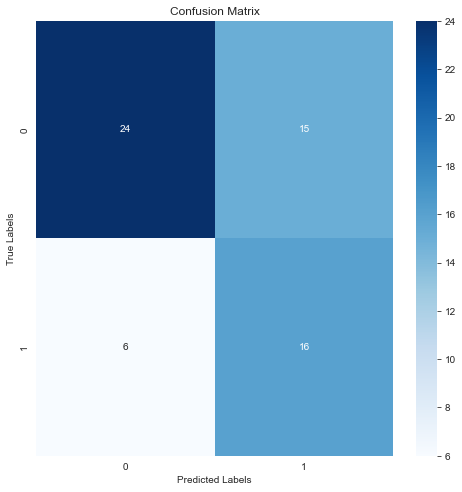

In [139]:
# Get the indices of the top 10 features
top10_idx = feature_importances.head(10).index
print(top10_idx)

# Subset the data based on the top 10 features
X_train_top10 = X_train_preprocessed[top10_idx]
X_test_top10 = X_test_preprocessed[top10_idx]

# Train the model on the top 10 features
the_saved_model.fit(X_train_top10, y_train)

# Evaluate the model on the test data
y_test_pred = the_saved_model.predict(X_test_top10)
evaluate_model("Gradient Boosting (test data, top 10 features)", y_test, y_test_pred)

In [140]:
# plot the top 1 feature based on features_df and labels_df (mem) - to see the difference between the groups

Fixation_Mean_Pupil_Mean
   Fixation_Mean_Pupil_Mean  familiarity
0                 -7.217224          1.0
1                  8.703285          1.0
2                  8.866815          1.0
3                  3.549411          0.0
4                  3.718497          0.0


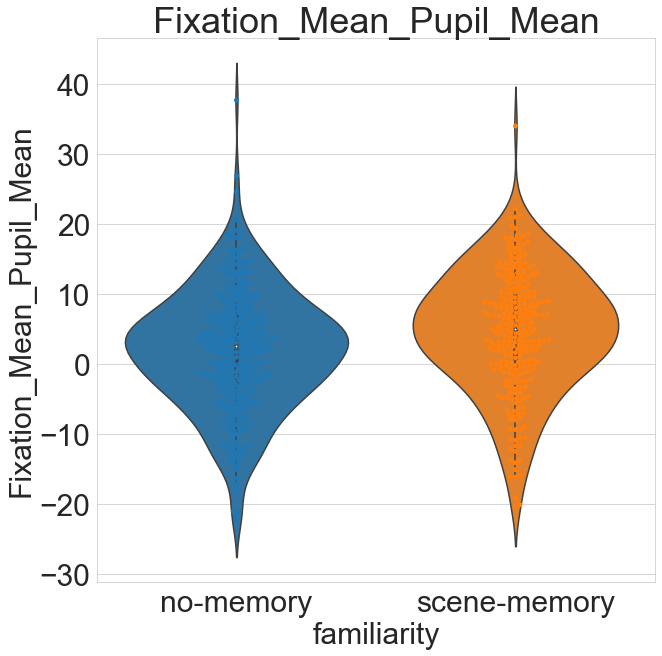

In [157]:
import seaborn as sns

# Get the index of the top 1 feature as string
top1_idx = str(feature_importances.head(1).index[0]) 
print(top1_idx)

# Subset the data based on the top 1 feature
data_df_top1 = features_df.merge(labels_df, left_index=True, right_index=True)[[top1_idx, 'familiarity']]
print(data_df_top1.head())

# remove the corresponding rows from y_train
series_id_df = series_id_df.loc[series_id_df.index.isin(features_df.index)]

# Create groups of subject IDs
groups = series_id_df[config.SUBJECT].values

# Group the data based on the groups created above (Subject IDs) and the 'familiarity' column, then calculate the mean of the top 1 feature
# data_df_top1 = data_df_top1.groupby([groups, 'familiarity']).mean().reset_index()

# Plot the top 1 feature in a swarmplot
plt.figure(figsize=(10, 10))
sns.swarmplot(x='familiarity', y=top1_idx, data=data_df_top1)
sns.violinplot(x='familiarity', y=top1_idx, data=data_df_top1)
plt.title(top1_idx)
# set the x-axis values
plt.xticks([0, 1], ['no-memory', 'scene-memory'])
# Increase the font size
plt.rcParams.update({'font.size': 30})
# Save the plot
plt.savefig('top1_feature.png')
plt.show()

Plot both distributions side by side of the top 1 feature for the two groups

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


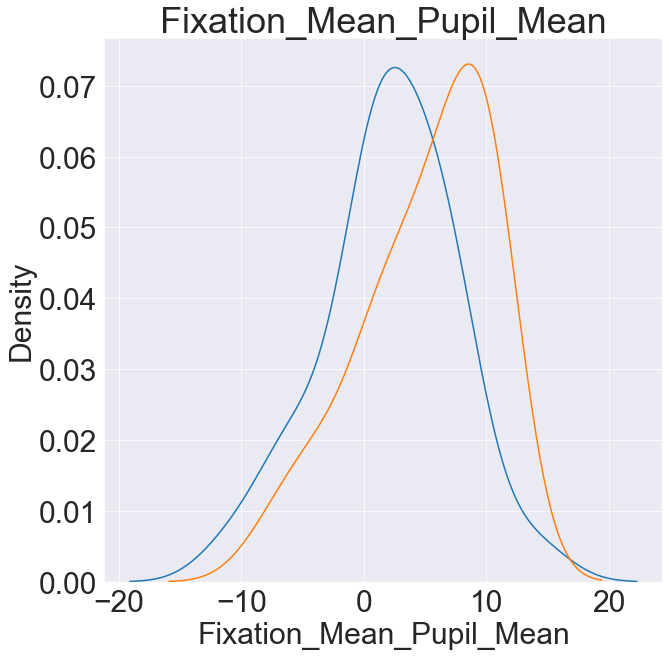

In [156]:
plt.figure(figsize=(10, 10))
sns.distplot(data_df_top1[data_df_top1['familiarity'] == 0][top1_idx], hist=False, label='0')
sns.distplot(data_df_top1[data_df_top1['familiarity'] == 1][top1_idx], hist=False, label='1')
plt.title(top1_idx)
plt.show()